In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#get the data 
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [5]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [6]:
train.shape

(27455, 785)

In [7]:
labels = train['label'].values

In [8]:
unique_val= np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

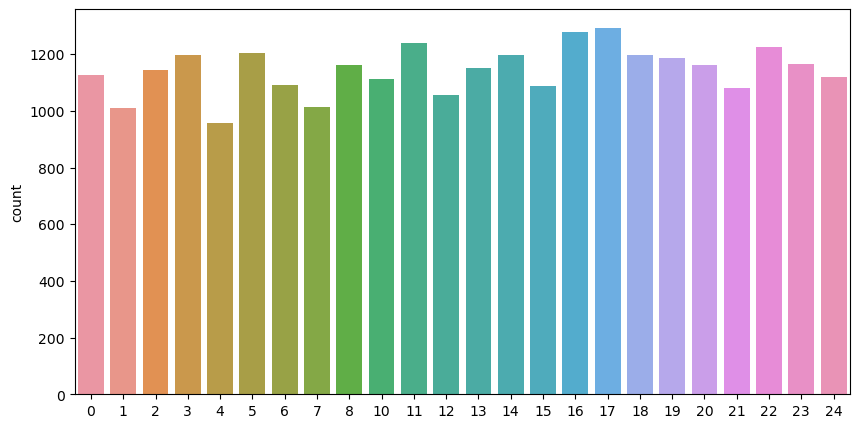

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=labels)

In [10]:
train.drop('label', axis=1,inplace=True)


In [11]:
#extract the image from each row of our CSV 
image=train.values
image=np.array([np.reshape(i,(28,28)) for i in image])
image = np.array([i.flatten() for i in image])

In [12]:
# one hot encoded our labels
#Class used to wrap the functionality of label_binarize and allow for fitting to classes independently of the transform operation.
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [13]:
print(labels)
# view our label length
len(labels[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


24

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


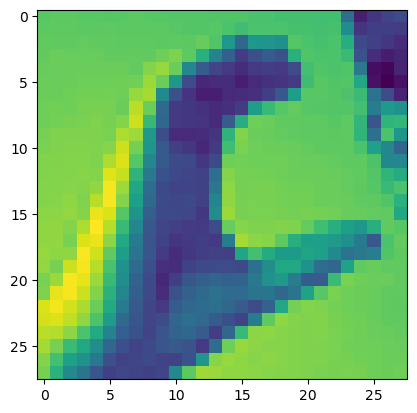

In [14]:
index =2
print(labels[index])
plt.imshow(image[index].reshape(28,28))

In [15]:
import cv2
import numpy as np
for i in range(0,10):
    rand= np.random.randint(0,len(image))
    input_im = image[rand]
    sample = input_im.reshape(28,28).astype(np.uint8)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test =train_test_split(image , labels , test_size = 0.33,random_state = 101)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

batch_size = 128
num_classes = 24
epochs = 10

In [17]:
# scaling our images
x_train =x_train /255.0
x_test = x_test /255.0

In [18]:
x_test.shape

(9061, 784)

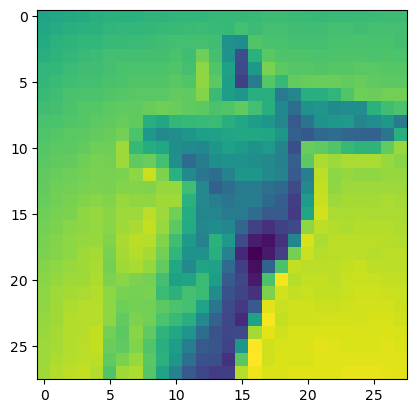

In [19]:
#reshaping the dataset
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [20]:
x_train.shape

(18394, 28, 28, 1)

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

In [24]:
# compling our model
model.compile(loss='categorical_crossentropy'
             ,optimizer = Adam(),
             metrics= [ 'accuracy'])

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
# from tensorflow.keras.optimizers import Adam

# batch_size = 128
# num_classes = 24
# epochs = 10

# model = Sequential()
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28,28, 1)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer=Adam(),
#               metrics=['accuracy'])

In [25]:
#training our model 
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = epochs ,batch_size = batch_size)

Epoch 1/10
144/144 [==============================] - 10s 62ms/step - loss: 2.7535 - accuracy: 0.1632 - val_loss: 1.7562 - val_accuracy: 0.4689
Epoch 2/10
144/144 [==============================] - 9s 60ms/step - loss: 1.3792 - accuracy: 0.5476 - val_loss: 0.8831 - val_accuracy: 0.7061
Epoch 3/10
144/144 [==============================] - 9s 61ms/step - loss: 0.8149 - accuracy: 0.7220 - val_loss: 0.5547 - val_accuracy: 0.8186
Epoch 4/10
144/144 [==============================] - 9s 59ms/step - loss: 0.5473 - accuracy: 0.8141 - val_loss: 0.3393 - val_accuracy: 0.8988
Epoch 5/10
144/144 [==============================] - 9s 62ms/step - loss: 0.3707 - accuracy: 0.8748 - val_loss: 0.2414 - val_accuracy: 0.9295
Epoch 6/10
144/144 [==============================] - 9s 60ms/step - loss: 0.2643 - accuracy: 0.9133 - val_loss: 0.1544 - val_accuracy: 0.9602
Epoch 7/10
144/144 [==============================] - 9s 62ms/step - loss: 0.1907 - accuracy: 0.9411 - val_loss: 0.1185 - val_accuracy: 0.971

In [26]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [ ]:
#saving the model 
# model.save('sign_mnist_cnn_50_Epochs')
# print('Model Saved')

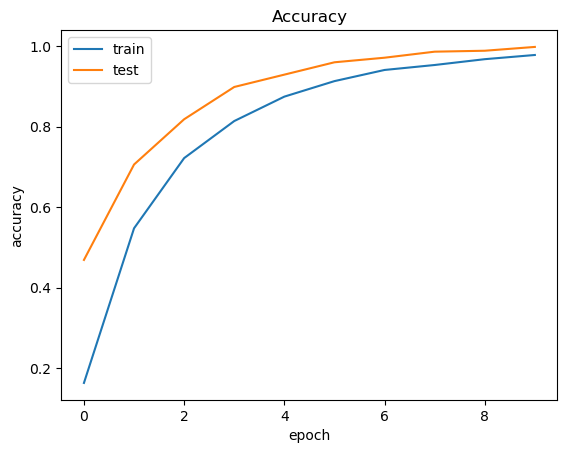

In [27]:
# view our training histroy graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

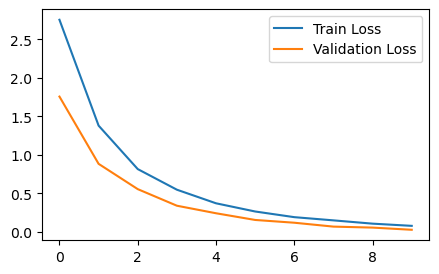

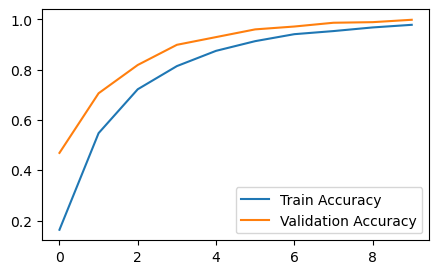

In [28]:
# Plot the loss value
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [29]:
# reshaping our test data in order to evaLuate its performance 
test_labels= test['label']
test.drop('label',axis=1,inplace=True)

test_image = test.values
test_image = np.array([np.reshape(i,(28,28)) for i in test_image])
test_image=np.array([i.flatten() for i in test_image])

test_labels = label_binarizer.fit_transform(test_labels)
test_image = test_image.reshape(test_image.shape[0],28,28,1)
test_image.shape


(7172, 28, 28, 1)

In [30]:
y_pred = model.predict(test_image)

225/225 [==============================] - 1s 5ms/step


In [31]:
# getting our accuracy
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round()) * 100

82.59899609592861